In [1]:
# Import dependencies
import pandas as pd
%matplotlib notebook 
import matplotlib.pyplot as plt

In [2]:
# Import merged_resedential_electricity_income.csv
file = 'HEAT_mean_2010_merged_income.csv'
income_therm_mean = pd.read_csv(file)

In [3]:
# Group income_kwh_mean by 'COMMUNITY AREA NAME'
area_income_mean = income_therm_mean.groupby('COMMUNITY AREA NAME').mean()

In [4]:
# Reset index of area_income_mean
area_income_mean.reset_index()

# Find the min and max of the mean per capita incomes of each neighborhood
# Clean up DataFrame and drop 'Unnamed: 0' column
area_income_mean_sum = area_income_mean.describe()
area_income_mean_sum.drop(columns='Unnamed: 0', inplace=True)
area_income_mean_sum

,PER CAPITA INCOME,THERM MEAN 2010,TOTAL POPULATION
count,77.000000,77.000000,77.000000
mean,25106.740260,3214.858790,158.777985
std,14952.672297,6078.637448,306.343074
min,8535.000000,1295.355759,45.851685
25%,15467.000000,1664.790658,77.282932
50%,20489.000000,1952.904097,99.049479
75%,29026.000000,2624.550650,142.782087
max,87163.000000,53087.466667,2677.166667


In [5]:
# Create bins to group results into per capita income brackets
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

# Create names for the bins
incomes = ["0 to 10k", "10k to 20k", "20 to 30k", "30 to 40k",
           "40 to 50k", "50 to 60k", "60 to 70k", "70 to 80k",
           "80 to 90k"]

In [6]:
# Slice area_income_mean and place it into income bins
# Place data series into a new column inside of area_income_mean
area_income_mean['PER CAPITA INCOME GROUPS'] = pd.cut(area_income_mean["PER CAPITA INCOME"], bins, labels=incomes)

In [7]:
# Make note of the overview of 'THERM MEAN 2010' for all neighborhoods
area_income_mean['THERM MEAN 2010'].describe()

count       77.000000
mean      3214.858790
std       6078.637448
min       1295.355759
25%       1664.790658
50%       1952.904097
75%       2624.550650
max      53087.466667
Name: THERM MEAN 2010, dtype: float64

In [8]:
# Group area_income_mean to reflect income groups
per_capita_income_grp = area_income_mean.groupby("PER CAPITA INCOME GROUPS").mean()

# Check per_capita_income_grp DataFrame
per_capita_income_grp = per_capita_income_grp[['THERM MEAN 2010']]
per_capita_income_grp

,THERM MEAN 2010
PER CAPITA INCOME GROUPS,
0 to 10k,1898.489290
10k to 20k,2096.748075
20 to 30k,2514.008691
30 to 40k,3065.539731
40 to 50k,2155.695061
50 to 60k,2539.799858
60 to 70k,31730.568636
70 to 80k,3102.251293
80 to 90k,8935.582759


In [9]:
# Reset index of per_capita_incom_grp
# (will combine with other DataFrams later)
# Make note of how 'THERM MEAN 2010' changed for income brackets
per_capita_income_grp.reset_index(inplace=True)
per_capita_income_grp['THERM MEAN 2010'].describe()

count        9.000000
mean      6448.742599
std       9726.491212
min       1898.489290
25%       2155.695061
50%       2539.799858
75%       3102.251293
max      31730.568636
Name: THERM MEAN 2010, dtype: float64

In [10]:
# Check neighborhood count per income bracket
count_per_capita_income = area_income_mean.groupby("PER CAPITA INCOME GROUPS").count()

# Just take one column from count_per_capita_income to get count
count_per_capita_income = count_per_capita_income[['PER CAPITA INCOME']]

# Reset index to merge DataFrame later
# Rename column to reflect actual data
count_per_capita_income.reset_index(inplace=True)
count_per_capita_income.rename(columns={'PER CAPITA INCOME': 'NEIGHBORHOOD COUNT'}, inplace=True)
count_per_capita_income.head(2)

,PER CAPITA INCOME GROUPS,NEIGHBORHOOD COUNT
0,0 to 10k,2
1,10k to 20k,34


In [11]:
# Check total population
# Taking the sum of total population within income brackets
## from the mean total population per community area
total_population = area_income_mean.groupby("PER CAPITA INCOME GROUPS").sum()

# Only select 'TOTAL POPULATION' column
# Reset indext, so DataFrame can be merged later
# Check total_population DataFrame
total_population = total_population[['TOTAL POPULATION']]
total_population.reset_index(inplace=True)
total_population.head(2)

,PER CAPITA INCOME GROUPS,TOTAL POPULATION
0,0 to 10k,218.338134
1,10k to 20k,3521.236517


In [12]:
# Combine DataFrames:
# per_capita_income_grp, count_per_capita_income, total_population

summary_meanKWH_residential = per_capita_income_grp
summary_meanKWH_residential['NEIGHBORHOOD COUNT'] = count_per_capita_income['NEIGHBORHOOD COUNT']
summary_meanKWH_residential['TOTAL POPULATION'] = total_population['TOTAL POPULATION']

summary_meanKWH_residential

,PER CAPITA INCOME GROUPS,THERM MEAN 2010,NEIGHBORHOOD COUNT,TOTAL POPULATION
0,0 to 10k,1898.489290,2,218.338134
1,10k to 20k,2096.748075,34,3521.236517
2,20 to 30k,2514.008691,23,2488.405846
3,30 to 40k,3065.539731,9,1416.560965
4,40 to 50k,2155.695061,3,292.398094
5,50 to 60k,2539.799858,2,247.956346
6,60 to 70k,31730.568636,2,3322.803030
7,70 to 80k,3102.251293,1,167.703440
8,80 to 90k,8935.582759,1,550.502463


<IPython.core.display.Javascript object>


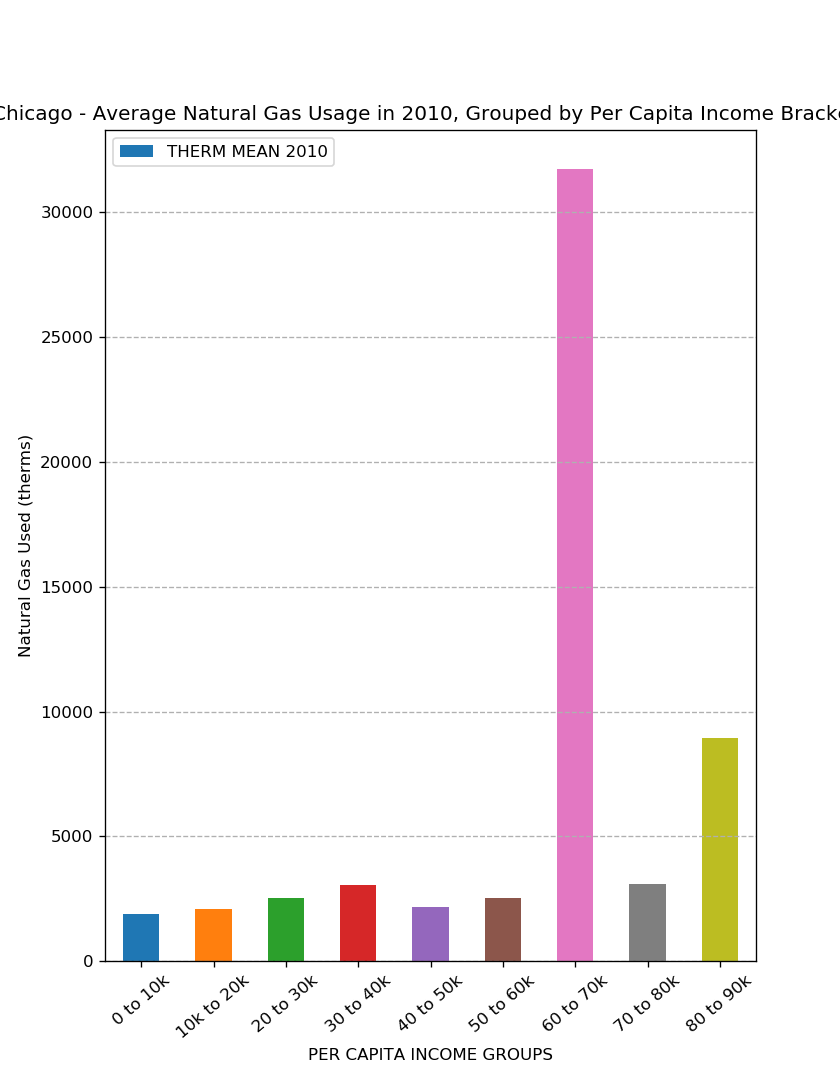

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [25]:
# Create bar plot from summary_meanKWH_residential 
# Compare income brackets to THERM MEAN 2010

# Create plot for per_capita_income_grp 
x = 'PER CAPITA INCOME GROUPS'
y = 'THERM MEAN 2010'
title = 'Chicago - Average Natural Gas Usage in 2010, Grouped by Per Capita Income Brackets'
per_capita_income_grp.plot(kind='bar', x=x, y=y, figsize=(7,9),
                           rot=40, title=title)

# Add y-axix lines to make reading graph easier
plt.gca().yaxis.grid(True, linestyle='--')

# Adjust location of legend
plt.legend(loc='upper left')

# y Label
# 1 Therm = 100,000 British Thermal Units (BTUs)
# Source: https://accel.peoplesgasdelivery.com/home/gas_rates.aspx 
plt.ylabel('Natural Gas Used (therms)')
plt.tight_layout

In [27]:
# Save figure
plt.savefig('HEAT_Avg_Per_Capita_Income.png')